In [ ]:
pip install scikit-learn pandas seaborn pickle 

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Алексей\Desktop\lec_2\venv\Scripts\python.exe -m pip install --upgrade pip' command.


### Занятие 2. Введение в ML. Построение и интерпретация простой модели регрессии / классификации

### Часть 1. Теория

#### 🛠️ Что такое машинное обучение? 

- **Машинное обучение** — дисциплина, заключающаяся в извлечении знаний из известных данных. Требуется по частным данным выявить общие зависимости, закономерности, взаимосвязи, присущие не только этой конкретной выборке, но всем прецедентам, в том числе тем, которые ещё не наблюдались. 
- В математическом смысле ML - это область знаний и исследований в области искусственного интеллекта, которая занимается разработкой алгоритмов и статистических моделей, которые могут аппроксимировать данные, обучаться на них, обобщать их на невидимые зависимости и, таким образом, выполнять задачи без явных инструкций.

#### 📊 Ключевые понятия:

- **Объект** — то, для чего надо сделать предсказание. Объекты обозначаются буквой $x$. 
- Множество всех объектов, для которых могут потребоваться предсказания, называется **пространством объектов** и обозначается $\mathbb{X}$.
- **Ответ** — то, что надо предсказать. Ответы обозначаются буквой $y$.
- **Пространство ответов** — множество всех ответов, с которыми мы можем работать. Оно обозначается $\mathbb{Y}$.

---

#### 📊 Признак и его типы

- **Признак** — это некая числовая характеристика объекта. 
- Совокупность всех признаков объекта $x = (x^{1}, x^{2},..., x^{d})$ называется его **признаковым описанием**. 

**Бинарные признаки**
- Принимают значения из множества $\{0, 1\}$
- Пример: пол пользователя (0 - женский, 1 - мужской)

**Числовые признаки**
- Принимают значения $\in \mathbb{R}$ (вещественные числа)
- Пример: возраст пользователя, цена товара

**Категориальные признаки**
- Принимают значения из конечного множества без порядка
- Нельзя сравнивать между собой
- Примеры: жанры книг, регионы пользователей, цвета

**Порядковые признаки**
- Принимают значения из множества с определенным порядком
- Можно сравнивать между собой
- Примеры: том книги, серия, уровень образования

**Признаки с множеством значений**
- Объект может иметь несколько значений одновременно
---


📌 Рассмотрим задачу диагности заболевания (например, отравление)

> Для какого объекта необходимо сделать предсказание?

> Что необходимо предсказать?

> Какие признаки могут быть использованы?

---
#### Типы задач в ML

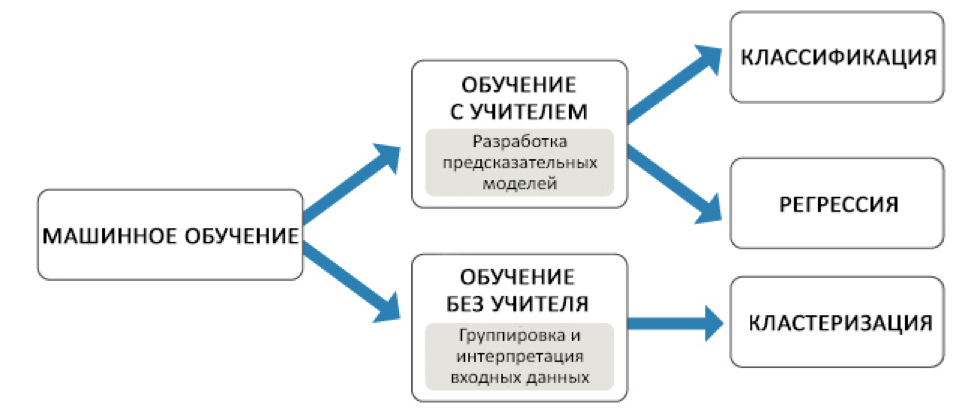

#### 👨‍🏫 Обучение с учителем (supervised learning)

**Определение**: Метод машинного обучения, при котором алгоритм обучается на размеченных данных, где каждому объекту соответствует правильный ответ.

##### **Некоторые типы задач в обучении с учителем:**

##### Регрессия (Regression)
- **Множество ответов**: вещественные числа  
- **Математическое представление**: $Y = \mathbb{R}$
- **Пример**: Определить, какой процент рекомендованной книги прочитает пользователь

#### Классификация (Classification)
- **Множество ответов**: конечное множество без порядка
- **Математическое представление**: $Y = \{1, ..., k\}$
- **Пример**: Определить жанр книги (единственным образом)

#### Бинарная классификация (Binary Classification)
- **Множество ответов**: два класса
- **Математическое представление**: $Y = \{-1, +1\}$ или $Y = \{0, 1\}$
- **Пример**: Определить, прочитает ли пользователь данную книгу или нет

#### Multi-label Classification
- **Множество ответов**: многоклассовая классификация с пересекающимися классами
- **Математическое представление**: $Y = \{0, 1\}^k$
- **Пример**: Определить жанры книги (может быть несколько одновременно)


#### ⚠️ Обучение без учителя (Unsupervised Learning)

**Определение**: Метод машинного обучения, при котором алгоритм работает с неразмеченными данными и самостоятельно находит скрытые структуры и закономерности.

**Ключевые особенности:**
- Отсутствуют размеченные данные (нет правильных ответов)
- Алгоритм самостоятельно обнаруживает паттерны в данных
- Используется для исследования данных и поиска скрытых структур

**Кластеризация** — основная задача машинного обучения без учителя, где дана обучающая выборка без ответов:

**Задача**: Разбить объекты на группы (кластеры) похожих объектов.



---
#### 🛠️ Формальная постановка задачи

У нас есть **набор данных** (обучающая выборка) из `n` примеров:

\[
D = \{(x_i, y_i)\}_{i=1}^n
\]

Где:  
- `x_i` — это набор характеристик (признаков) объекта. Например, для автомобиля это может быть: пробег, возраст, марка.  
- `y_i` — правильный ответ (целевая переменная). Например: цена автомобиля.  

**Задача**: построить функцию `f(x)`, которая будет как можно лучше предсказывать `y` по данным `x`.


#### 🛠️ Функция потерь (Loss Function)

Чтобы понять, насколько хорошо работает модель, вводят **функцию потерь**:
\[
L(f(x), y)
\]

Она показывает, насколько сильно предсказание модели `f(x)` отличается от настоящего ответа `y`.  

---

#### 🏃 Основные этапы обучения с учителем

**1. Подготовка данных**
- Преобразование признаков (нормализация, кодирование категориальных признаков).  
- Разделение на:
  - **Обучающую выборку** (train) — для обучения.  
  - **Тестовую выборку** (test) — для проверки качества.

**2. Выбор модели (зависит от задачи)**

**3. Определение функции потерь**
- Задаём меру ошибки, которую нужно минимизировать**

**4. Обучение модели** 
- Алгоритм подбирает параметры модели так, чтобы минимизировать функцию потерь 

**5. Оценка качества**
- Считаем метрики на **тестовой выборке**
- Смотрим, насколько модель обобщает знания, а не просто "запомнила" данные.
- При оценке используем **метрики качества**

**6. Улучшение модели**
- Добавление или отбор признаков (feature engineering).  
- Использование регуляризации (L1/L2) для борьбы с переобучением.  
- Ансамбли моделей (бэггинг, бустинг, случайный лес) и др.

**7. Применение модели**
- Обученную и проверенную модель используют на **новых данных** для предсказаний

---


### Часть 2. Реализация задачи регрессии

####  **Линейная регрессия: основы**

**Пример задачи**

Рассмотрим небольшой набор данных о коттеджах в одном районе:
- **Признак (X)**: площадь дома (м²)
- **Признак (X2)**: количество комнат (шт.)
- **Целевая переменная (Y)**: рыночная стоимость (млн руб.)
- **Цель**: построить модель, предсказывающую стоимость дома на основе его площади и количестве комнат.

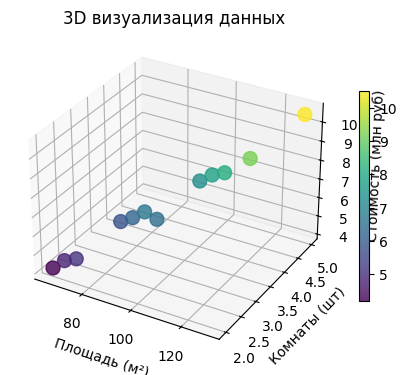

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем демонстрационный набор данных
data = {
    'Площадь (м²)': [65, 80, 95, 110, 70, 85, 100, 120, 75, 90, 105, 130],
    'Комнаты (шт)': [2, 3, 3, 4, 2, 3, 4, 4, 2, 3, 4, 5],
    'Стоимость (млн руб)': [4.2, 5.8, 6.5, 8.1, 4.8, 6.2, 7.3, 9.2, 5.1, 6.7, 7.8, 10.5]
}

df = pd.DataFrame(data)

# Создаем фигуру с несколькими графиками
fig = plt.figure(figsize=(18, 12))

# 1. Трехмерная визуализация
ax1 = fig.add_subplot(231, projection='3d')
scatter = ax1.scatter(df['Площадь (м²)'], df['Комнаты (шт)'], df['Стоимость (млн руб)'],
                     c=df['Стоимость (млн руб)'], cmap='viridis', s=100, alpha=0.8)
ax1.set_xlabel('Площадь (м²)')
ax1.set_ylabel('Комнаты (шт)')
ax1.set_zlabel('Стоимость (млн руб)')
ax1.set_title('3D визуализация данных')
fig.colorbar(scatter, ax=ax1, shrink=0.5, aspect=20)

**Как нам поможет линейная регрессия?**

Линейная регрессия ищет **прямую зависимость** между признаками (площадь, комнаты) и ценой.  

**Общая формула линейной регрессии**:  
$$
a(x) = w_{0} + w_{1}x_{1} + w_{2}x_{2} + ... + w_{n}x_{n}
$$

- \(a(x)\) — предсказанное значение (цена дома)  
- \(x_i\) — i-й признак (например, площадь, комнаты)  
- \(w_i\) — коэффициент, показывающий, **на сколько изменится цена**, если увеличится этот признак на 1 единицу  
- \(w_0\) — базовое значение цены, когда все признаки равны нулю  


**Практический расчет**

Предположим, наша модель посчитала:  
$$
\text{Цена} = 0.05 \cdot \text{Площадь} + 0.3 \cdot \text{Комнаты} + 2
$$

- Значит, каждый квадратный метр увеличивает цену на 0.05 млн руб.  
- Каждая комната добавляет 0.3 млн руб.  
- Базовая цена дома (без площади и комнат) — 2 млн руб.  

Теперь, если мы знаем площадь и количество комнат нового дома, можем найти прямую зависимость между признаками и целевой переменной


**Практический этап: расчитаем стоимость недвижимость в Бостоне?**

- Загрузите файл "boston" в «Сессионное хранилище» в Google Colab.

Каждая единица данных — это район Бостона с информацией об:

- уровне преступности (CRIM);
- качестве воздуха (NOX);
- транспортной доступности (RAD);
- налогах (TAX);
- количестве учителей (PTRATIO);
- социальном положении населения (LSTAT) и др.

Целевой переменной является медианная цена недвижимости в каждом из районов (MEDV). Именно ее и нужно научиться предсказывать.

In [9]:
data_boston = pd.read_csv('boston.csv')
data_boston.sample(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
121,0.07165,0.0,25.65,0.0,0.581,6.004,84.1,2.1974,2.0,188.0,19.1,377.67,14.27,20.3
482,5.73116,0.0,18.10,0.0,0.532,7.061,77.0,3.4106,24.0,666.0,20.2,395.28,7.01,25.0


**Этап 1. Предварительная обработка данных**
- просмотреть описательные статистики 
- проверить тип данных
- проверить наличие пропусков. Если есть пропуски, то просто удалите их
- есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их

In [15]:
# Ваш код

**Этап 2. Исследовательский анализ данных**

- Линейная регрессия основана на предположении о линейной зависимости между признаками и целевой переменной
- Если связь сильная, то этот признак окажет наибольшее влияние на целевую сеть
- Корреляция принимает значения: ближе к 1 - сильная взаимосвязь, -1 - слабая взаимосвязь или вовсе отсутствие таковой

Прежде чем выбирать переменные для включения в модель, имеет смысл проверить, насколько хорошо соблюдается эта взаимосвязь Выведите матрицу корреляций между всеми признаками и целевой переменной.
- Пример: df.corr() -- > расчет 
- Пример: sns.heatmap(df.corr()) -- > визуализация в формате тепловой карты 

- Посмотрим на корреляционную матрицу: если коэффициент положительный, то зависимость прямая (положительное направление), иначе обратная(отрицательное направление)

In [14]:
# Ваш код

**Этап 3. Отбор и выделение признаков**

- После того, как мы собрали достаточно данных о взаимосвязи переменных, мы можем начать отбор наиболее значимых признаков (feature selection) и создание или выделение новых (feature extraction).
- Поместим признаки в переменную X, а цены на жилье в переменную y.

In [16]:
# Ваш код

**Этап 4. Обучение и оценка качества модели**

В машинном обучении для поиска оптимальный параметров алгоритма набор данных делят на две части:

1. **Обучающая выборка (Train)**  
   - Используется для **обучения модели** (подбора коэффициентов).  
   - Модель "учится" на этих данных, минимизируя функцию потерь.

2. **Тестовая выборка (Test)**  
   - Используется для **проверки качества модели**.  
   - Модель не видела эти данные на этапе обучения.  
   - Позволяет оценить, насколько хорошо модель будет работать на новых данных.

**Как работает код**

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,              # наши признаки (X) и ответы (y)
    test_size=0.3,     # 30% данных уйдет в тестовую выборку
    random_state=42    # фиксируем "случайность", чтобы при повторном запуске деление было одинаковым
)
```
- X_train, y_train - тренировочный набор
- X_test, y_test - тестовый набор

In [18]:
# Ваш код

#### Как работает обучение (тренировка) модели

**Обучение модели** — это процесс, когда алгоритм **подбирает параметры**, чтобы предсказания были как можно ближе к реальным ответам.

**Пошаговый алгоритм::**

1. **Начало**: выбираем случайные коэффициенты \(w_0, w_1, ... w_n\)  
2. **Предсказание**: модель считает \(a(x) = w_0 + w_1 x_1 + ... + w_n x_n\) для всех объектов обучающей выборки  
3. **Вычисление ошибки**: считаем функцию потерь
4. **Обновление коэффициентов**: алгоритм немного меняет \(w_i\), чтобы уменьшить ошибку  
5. **Повторение**: шаги 2–4 повторяются, пока ошибка не станет минимальной или не достигнем заданного числа итераций

**Как работает код**
```python
from sklearn.linear_model import LinearRegression

# Создаем модель линейной регрессии
model = LinearRegression()

# Обучаем модель на обучающих данных
model.fit(X_train, y_train)

# на основе нескольких независимых переменных (Х) предскажем значение (y)
y_pred = model.predict(X_test)

```

In [21]:
# Ваш код

**Этап 5. Оценка качества модели**

Напомним:
- Функция потерь - это функция, которая минимизируется в процессе обучения модели (по-другому она называется loss).
- Метрика качества - это функция, которая используется для оценки качества уже готовой (обученной) модели.

Иногда одну и ту же функцию используют и в роли лосса, и как метрику качества, и это совершенно нормально.

🤓 **Метрики качества регрессии**

*1. MAE (Mean Absolute Error) — средняя абсолютная ошибка*

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - a(x_i)|
$$

- где 
  - \(a(x_i)\) — предсказание модели на объекте \(x_i\),  
  - \(y_i\) — правильный ответ (истинное значение),  
  - \(n\) — число объектов в выборке, на которой вычисляется значение метрики.

- Показывает, **на сколько в среднем модель ошибается**. Простая и легко интерпретируемая  
- Устойчива к небольшим выбросам. Но в работе с большими данными дает осечки

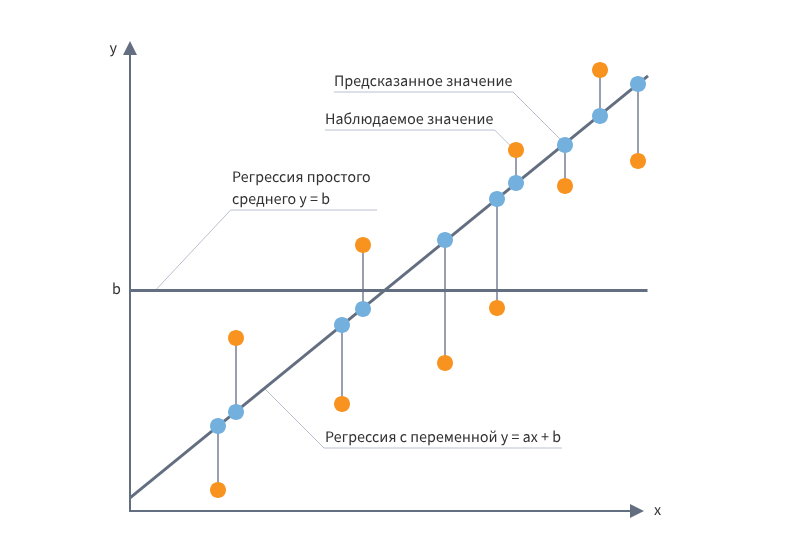


*2. MSE (Mean Squared Error) — среднеквадратичная ошибка*

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - a(x_i))^2
$$

- Ошибки возводятся в квадрат → **крупные ошибки штрафуются сильнее**  
- Если использовать MSE как метрику, то у неё есть два недостатка:
- Во-первых, она не сохраняет размерность, так как возводит значения в квадрат. 

*3. RMSE (Root Mean Squared Error) — корень из MSE*

$$
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - a(x_i))^2 }
$$

- То же, что MSE, но в **тех же единицах**, что и целевая переменная \(y\)  
- Удобно для интерпретации «средней ошибки» в реальных единицах. Поэтому на практике используют RMSE вместо MSE



*4. R² (коэффициент детерминации)*

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - a(x_i))^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

- Показывает, **какую часть разброса данных объясняет модель**  
- Обратите внимание: в знаменателе дроби находится константа (число, не зависящее от модели), а в числителе - MSE.

- Для идеальной модели, когда ошибки нет (\(MSE = 0\)):

$$
R^2 = 1
$$

- Чем хуже модель (чем больше \(MSE\)), тем меньше значение \(R^2\). 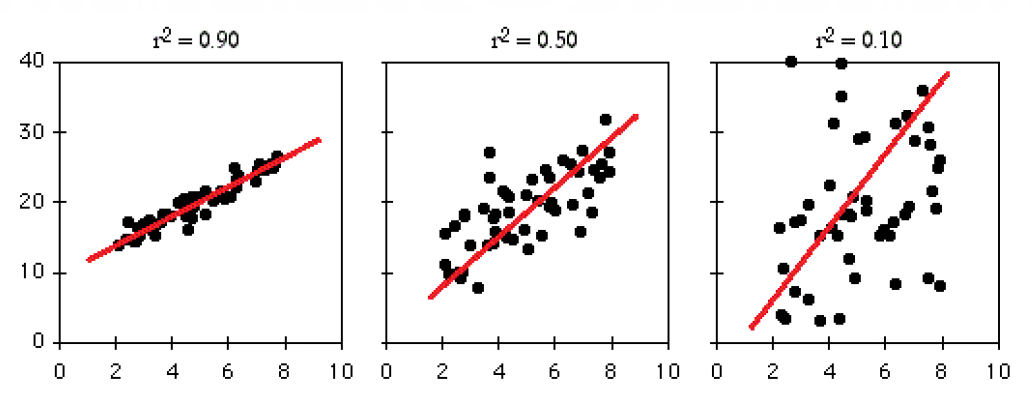

**Как работает код**
```python

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False → RMSE
r2 = r2_score(y_test, y_pred)
```

In [22]:
# Ваш код

Ура! Вы обучили свою первую модель. Эти показатели могут быть улучшены. Мы рассмотрим это подробнее в ходе нашего курса.

### Часть 3. Реализация задачи регрессии. Практикум

- **Контекст**: Бриллианты (diamonds) - классический набор данных, содержит цены и другие характеристики почти 54 000 бриллиантов. 

- **Задача**: Проанализировать датасет и цену блиллиантов в долларах США. Обучить модель и оценить качество модели. 

**Данные**: 
- price - объект 
- carat - вес бриллианта в каратах (0,2–5,01)
- cut - качество огранки (удовлетворительное, хорошее, очень хорошее, премиальное, идеальное)
- color - цвет бриллианта, от J (худший) до D (лучший)
- clarity - мера чистоты бриллианта (I1 (наихудшая), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (наилучшая))
- x  - длина в мм (0--10,74)
- y - ширина y в мм (0--58,9)
- z - глубина в мм (0--31,8)
- depth = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table - ширина площадки верха алмаза относительно самой широкой точки (43–95)

**Результат**: 
- Веса модели сохранить в pkl: 

```python
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [23]:
# Ваш код